## Загрузим нужные библиотеки

In [1]:
import os
import numpy as np
import pandas as pd

from ast import literal_eval

In [2]:
#import plotly.express as px

import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

### Reproducibility block

In [3]:
# seed the RNG for all devices (both CPU and CUDA)
#torch.manual_seed(1984)

#Disabling the benchmarking feature causes cuDNN to deterministically select an algorithm, 
#possibly at the cost of reduced performance.
#torch.backends.cudnn.benchmark = False

# for custom operators,
import random
random.seed(5986721)

# 
np.random.seed(62185)

#sklearn take seed from a line abowe

In [ ]:
def plot_hists_sns(inp_df, inp_feature):
    
    fig, axes = plt.subplots(4, 3, figsize=(30,30))
    
    sns.histplot(ax = axes[0, 0],
                data = inp_df,
                x = inp_feature
                )
    
    
#views
    tmp_df = inp_df.groupby([inp_feature]).views.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[1, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values
               )
    axes[1, 0].set_title(f'Histogram of minimum views over {inp_feature}')
    sns.barplot(ax = axes[1, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values
               )
    axes[1, 1].set_title(f'Histogram of maximum views over {inp_feature}')
    sns.barplot(ax = axes[1, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values
               )
    axes[1, 2].set_title(f'Histogram of average views over {inp_feature}')
    
    
#depth
    tmp_df = inp_df.groupby([inp_feature]).depth.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[2, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values
               )
    axes[2, 0].set_title(f'Histogram of minimum depth over {inp_feature}')
    sns.barplot(ax = axes[2, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values
               )
    axes[2, 1].set_title(f'Histogram of maximum depth over {inp_feature}')
    sns.barplot(ax = axes[2, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values
               )
    axes[2, 2].set_title(f'Histogram of average depth over {inp_feature}')
    
    
#full_reads_percent
    tmp_df = inp_df.groupby([inp_feature]).full_reads_percent.agg(val_min='min', val_max='max', val_aver='mean')
    sns.barplot(ax = axes[3, 0],
               x = tmp_df.index,
               y = tmp_df.val_min.values
               )
    axes[3, 0].set_title(f'Histogram of minimum full_reads_percent over {inp_feature}')
    sns.barplot(ax = axes[3, 1],
               x = tmp_df.index,
               y = tmp_df.val_max.values
               )
    axes[3, 1].set_title(f'Histogram of maximum full_reads_percent over {inp_feature}')
    sns.barplot(ax = axes[3, 2],
               x = tmp_df.index,
               y = tmp_df.val_aver.values
               )
    axes[3, 2].set_title(f'Histogram of aver full_reads_percent over {inp_feature}')
    
    fig.show()

Выполним загрузу датсета

In [4]:
DIR_DATA  = os.path.join(os.getcwd(), 'data')
#DIR_TRAIN = os.path.join(DIR_DATA, 'train')
#DIR_TEST  = os.path.join(DIR_DATA, 'test')
DIR_SUBM  = os.path.join(os.getcwd(), 'subm')

In [5]:
df_train = pd.read_csv(os.path.join(DIR_DATA, 'train.csv'), index_col= 0)
df_test = pd.read_csv(os.path.join(DIR_DATA, 'test.csv'), index_col= 0)

# Проанализируем датасет

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   object 
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   object 
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 601.6+ KB


In [7]:
df_train.describe()

,ctr,views,depth,full_reads_percent
count,7000.000000,7.000000e+03,7000.000000,7000.000000
mean,2.217779,3.035162e+04,1.104794,34.619633
std,2.778085,9.547786e+04,0.065018,10.775901
min,0.000000,6.500000e+01,1.016000,4.978000
25%,0.000000,5.438250e+03,1.055000,27.516000
50%,1.348500,1.196200e+04,1.082000,34.334500
75%,3.598500,2.705300e+04,1.147000,41.366250
max,39.877000,2.554204e+06,1.799000,267.623000


● **document id** - идентификатор    
● **title** - заголовок статьи   
● **publish_date** - время публикации   
● **session** - номер сессии   
● **authors** - код автора   
● **views** - количество просмотров   
● **depth** - объем прочитанного материала   
● **full_reads percent** - процент читателей полностью прочитавших статью   
● **ctr** - показатель кликабельности   
● **category** - категория статьи   
● **tags** - ключевые слова в статье   

In [8]:
df_train.shape, df_train.index.nunique()

((7000, 10), 7000)

# publish_date

In [9]:
df_train['publish_date'] = pd.to_datetime(df_train['publish_date'])

df_train['hour'] = df_train['publish_date'].dt.hour
df_train['dow'] = df_train['publish_date'].dt.dayofweek
#Monday=0, Sunday=6
df_train['weekend'] = (df_train.dow >= 4) # 5
#df_train['holidays']
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [115]:
df_test['publish_date'] = pd.to_datetime(df_test['publish_date'])

проверим границы дат

In [117]:
df_train['publish_date'].min(), df_test['publish_date'].min()

(Timestamp('2017-08-07 13:00:27'), Timestamp('2021-10-04 11:51:32'))

In [118]:
df_train['publish_date'].max(), df_test['publish_date'].max()

(Timestamp('2022-05-29 20:13:12'), Timestamp('2022-05-29 19:44:21'))

In [120]:
df_train[df_train.publish_date > df_test['publish_date'].min()].shape

(6994, 14)

In [121]:
df_train[df_train.publish_date < df_test['publish_date'].min()].shape

(6, 14)

всего 6 статей в трейне датой раньше, чем минимальная дата в тесте. вероятно их следует исключить исходя из предположения, что они из другого распределения

In [125]:
#df_train[df_train.publish_date < df_test['publish_date'].min()]

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


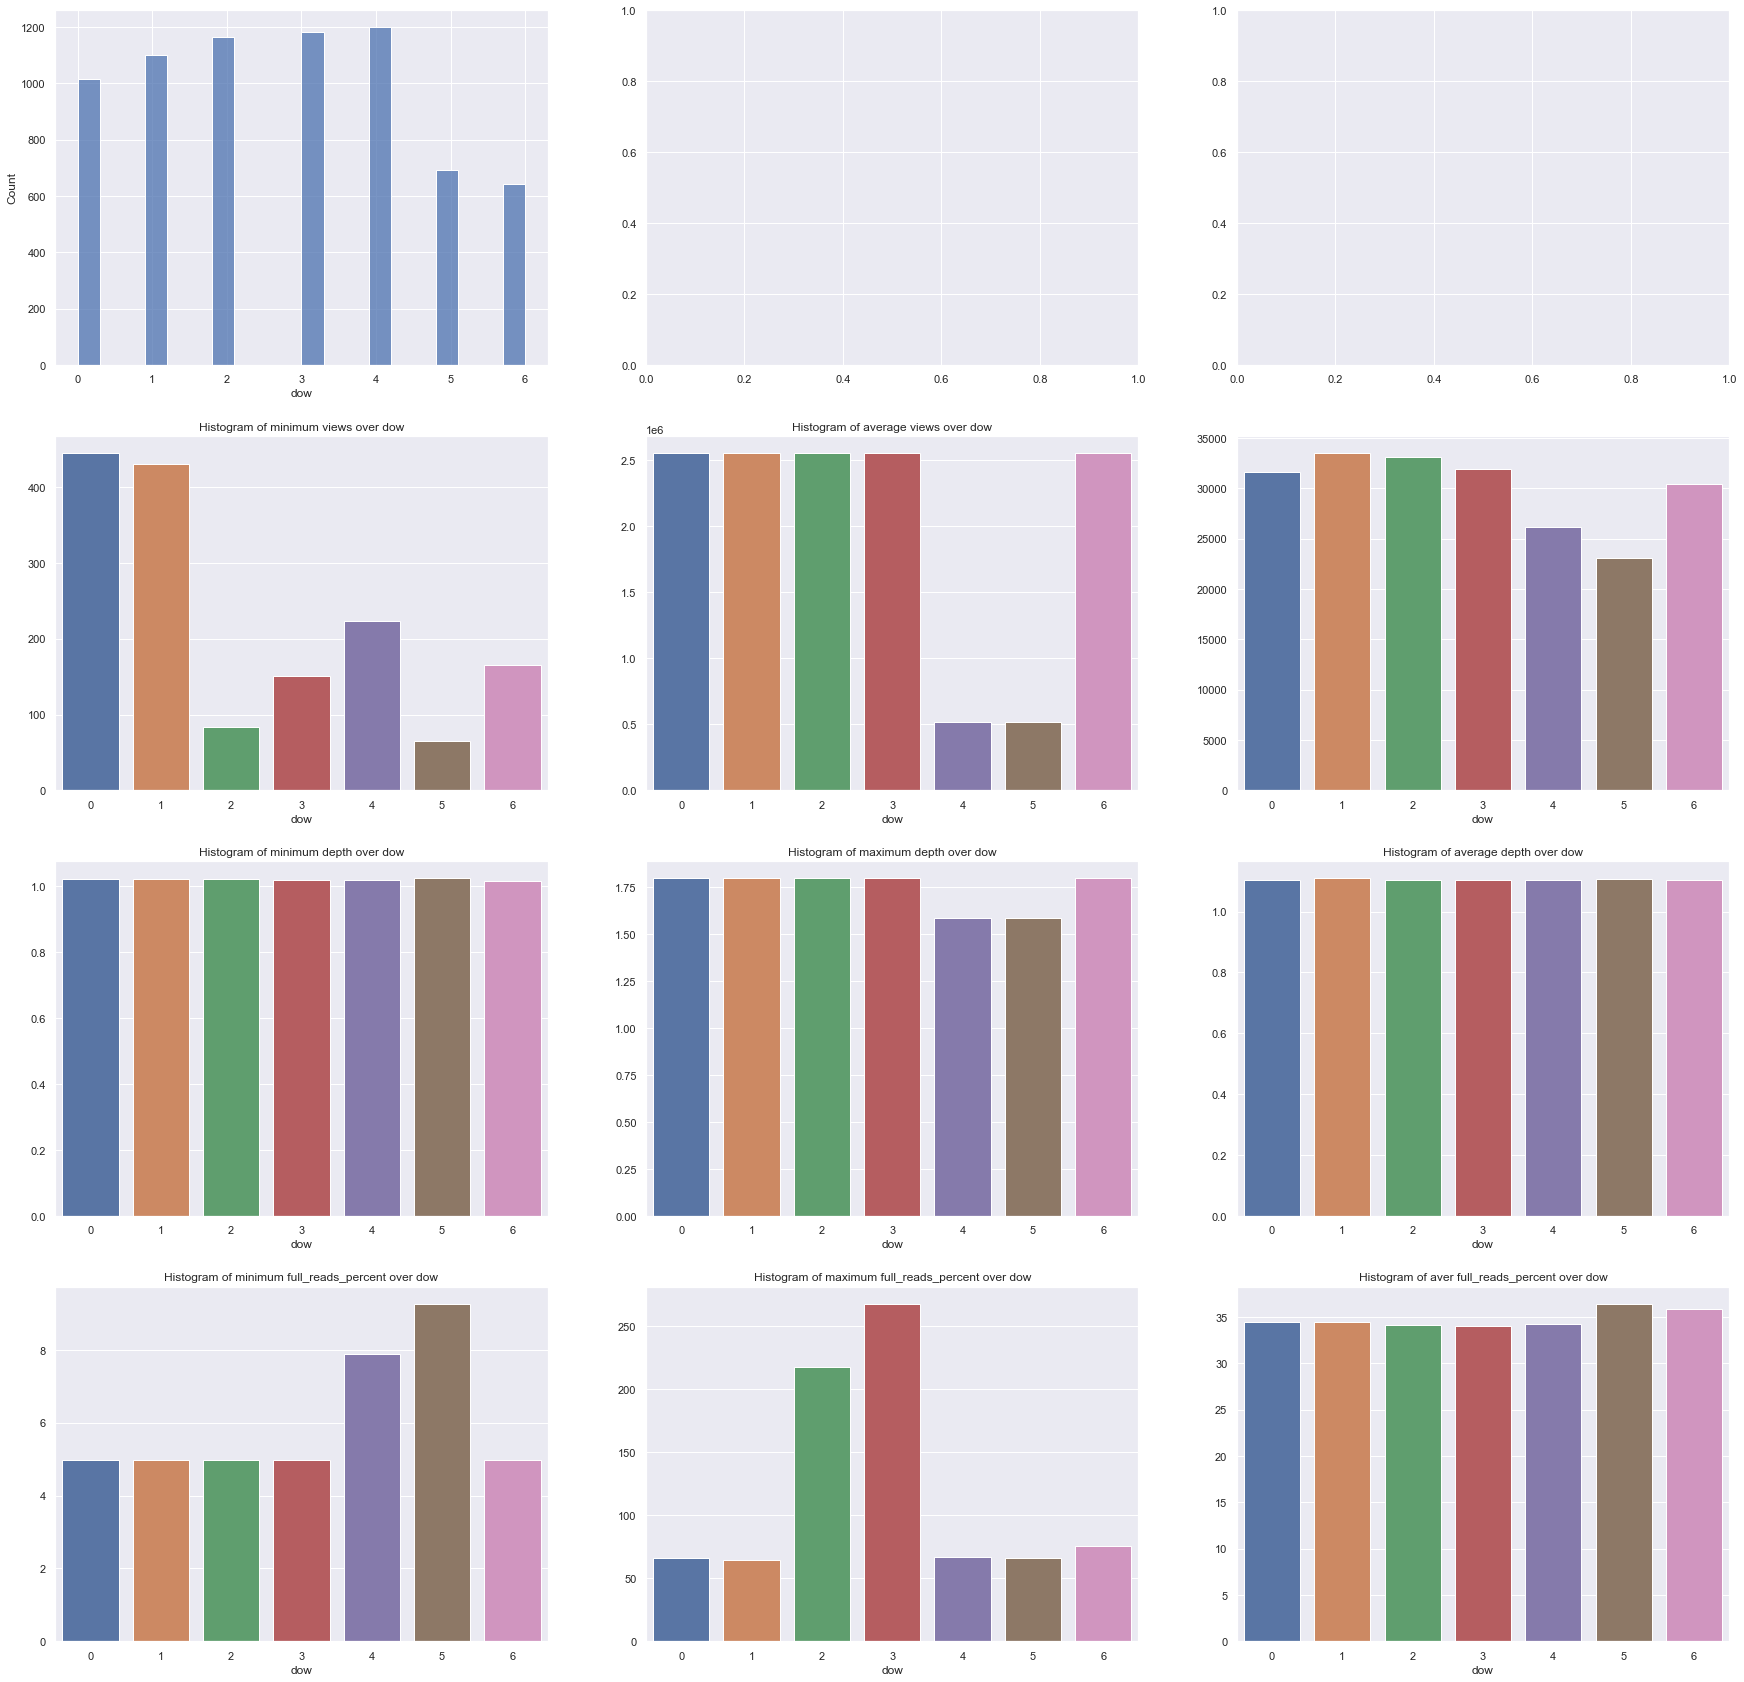

In [88]:
plot_hists_sns(df_train, 'dow')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


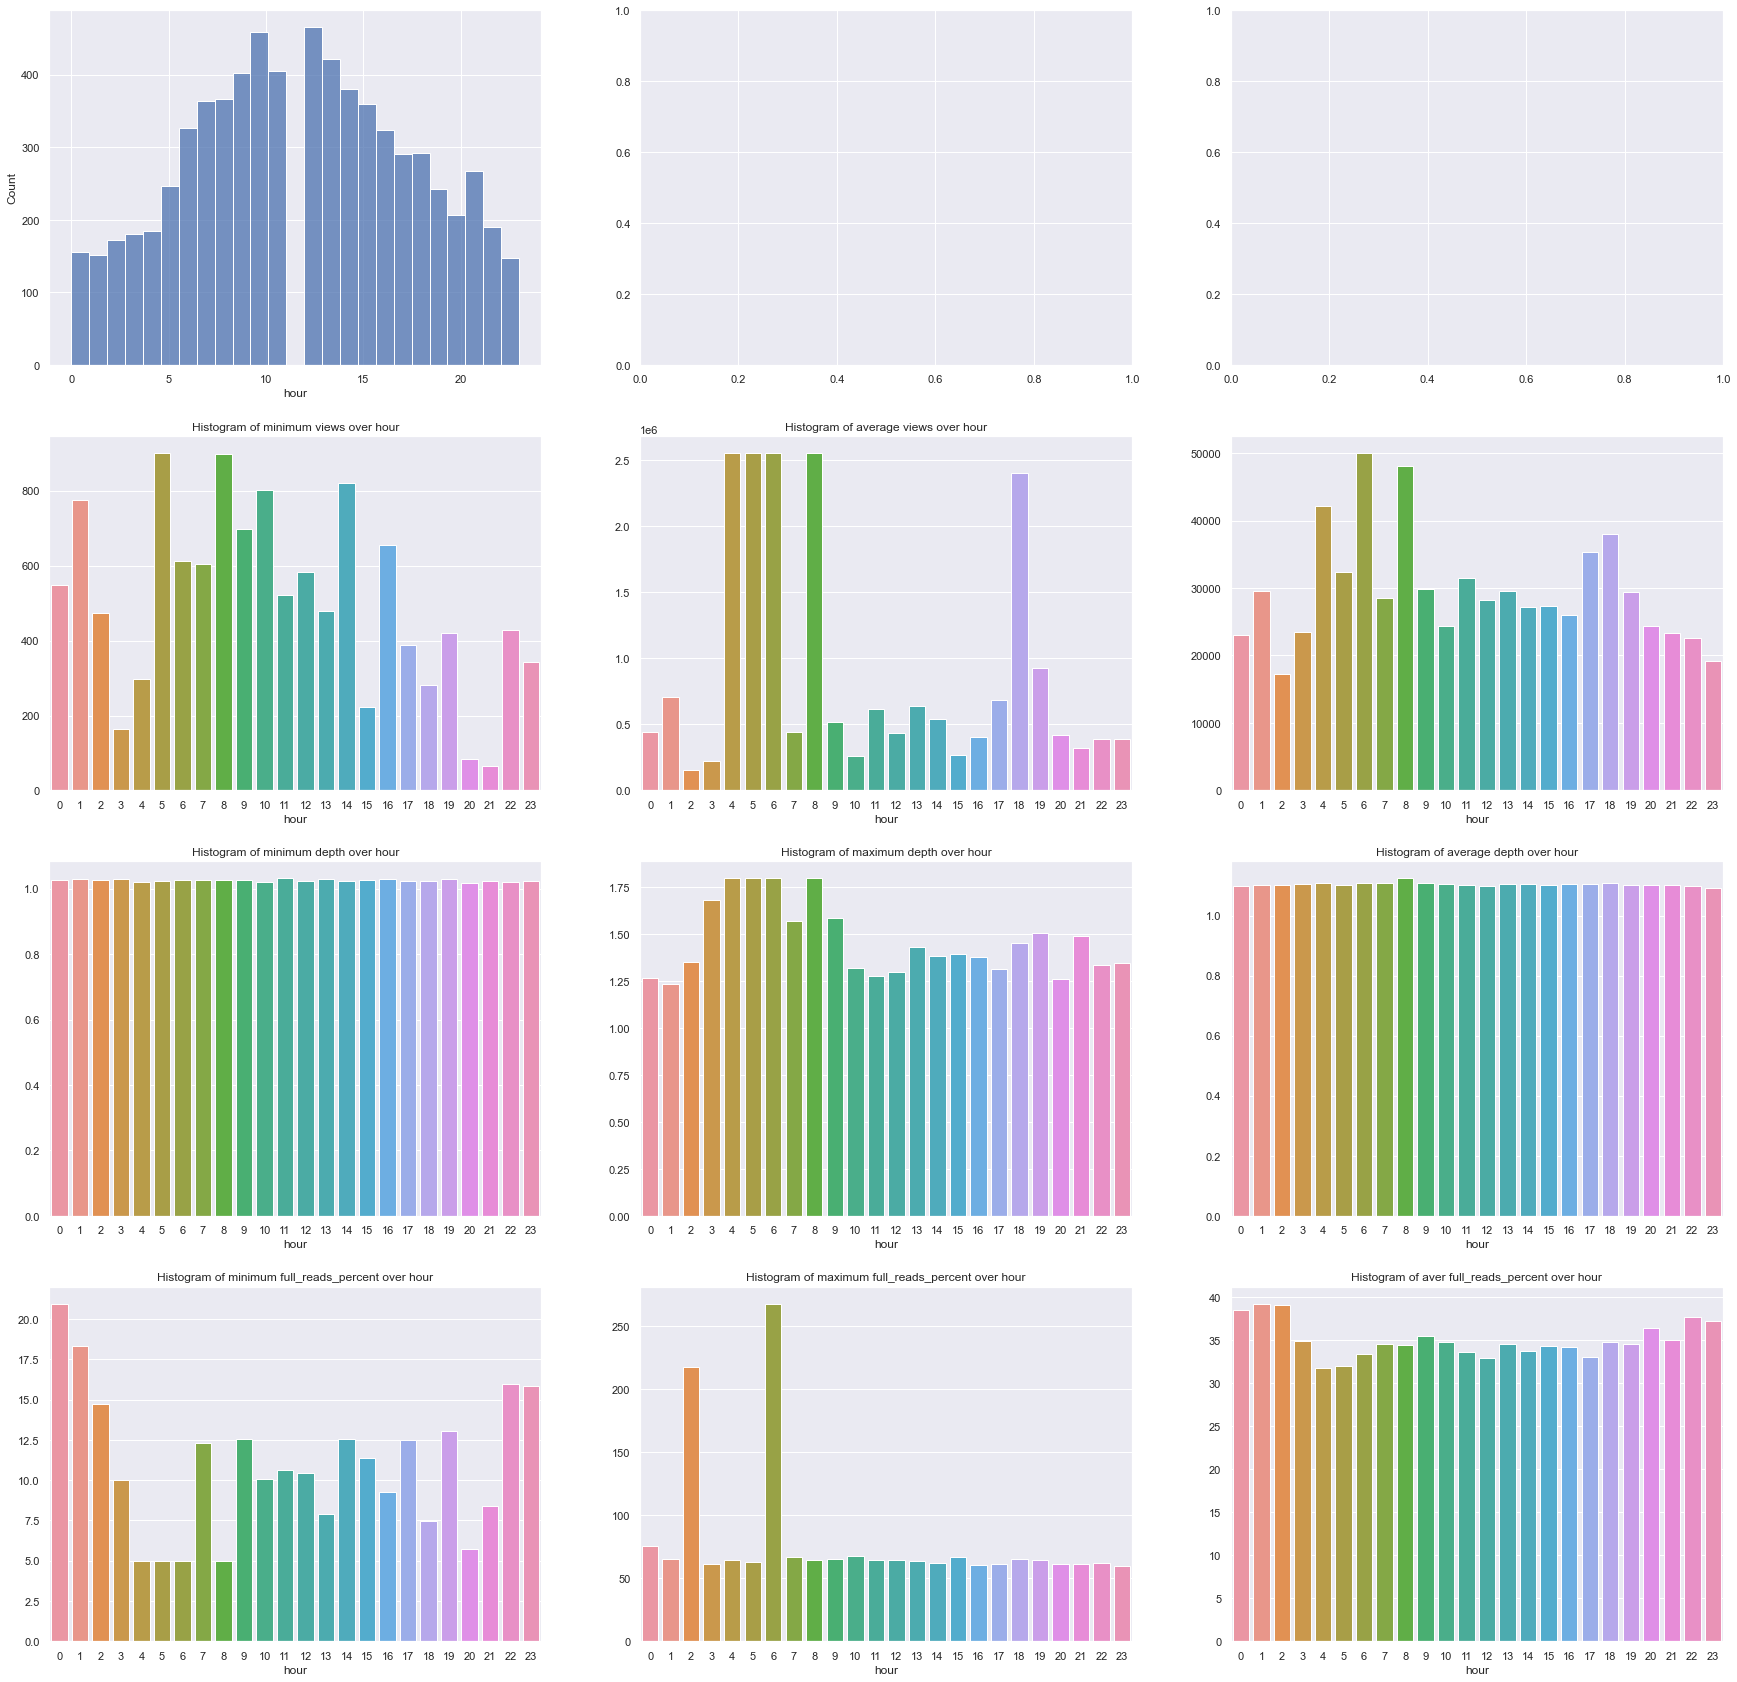

In [89]:
plot_hists_sns(df_train, 'hour')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


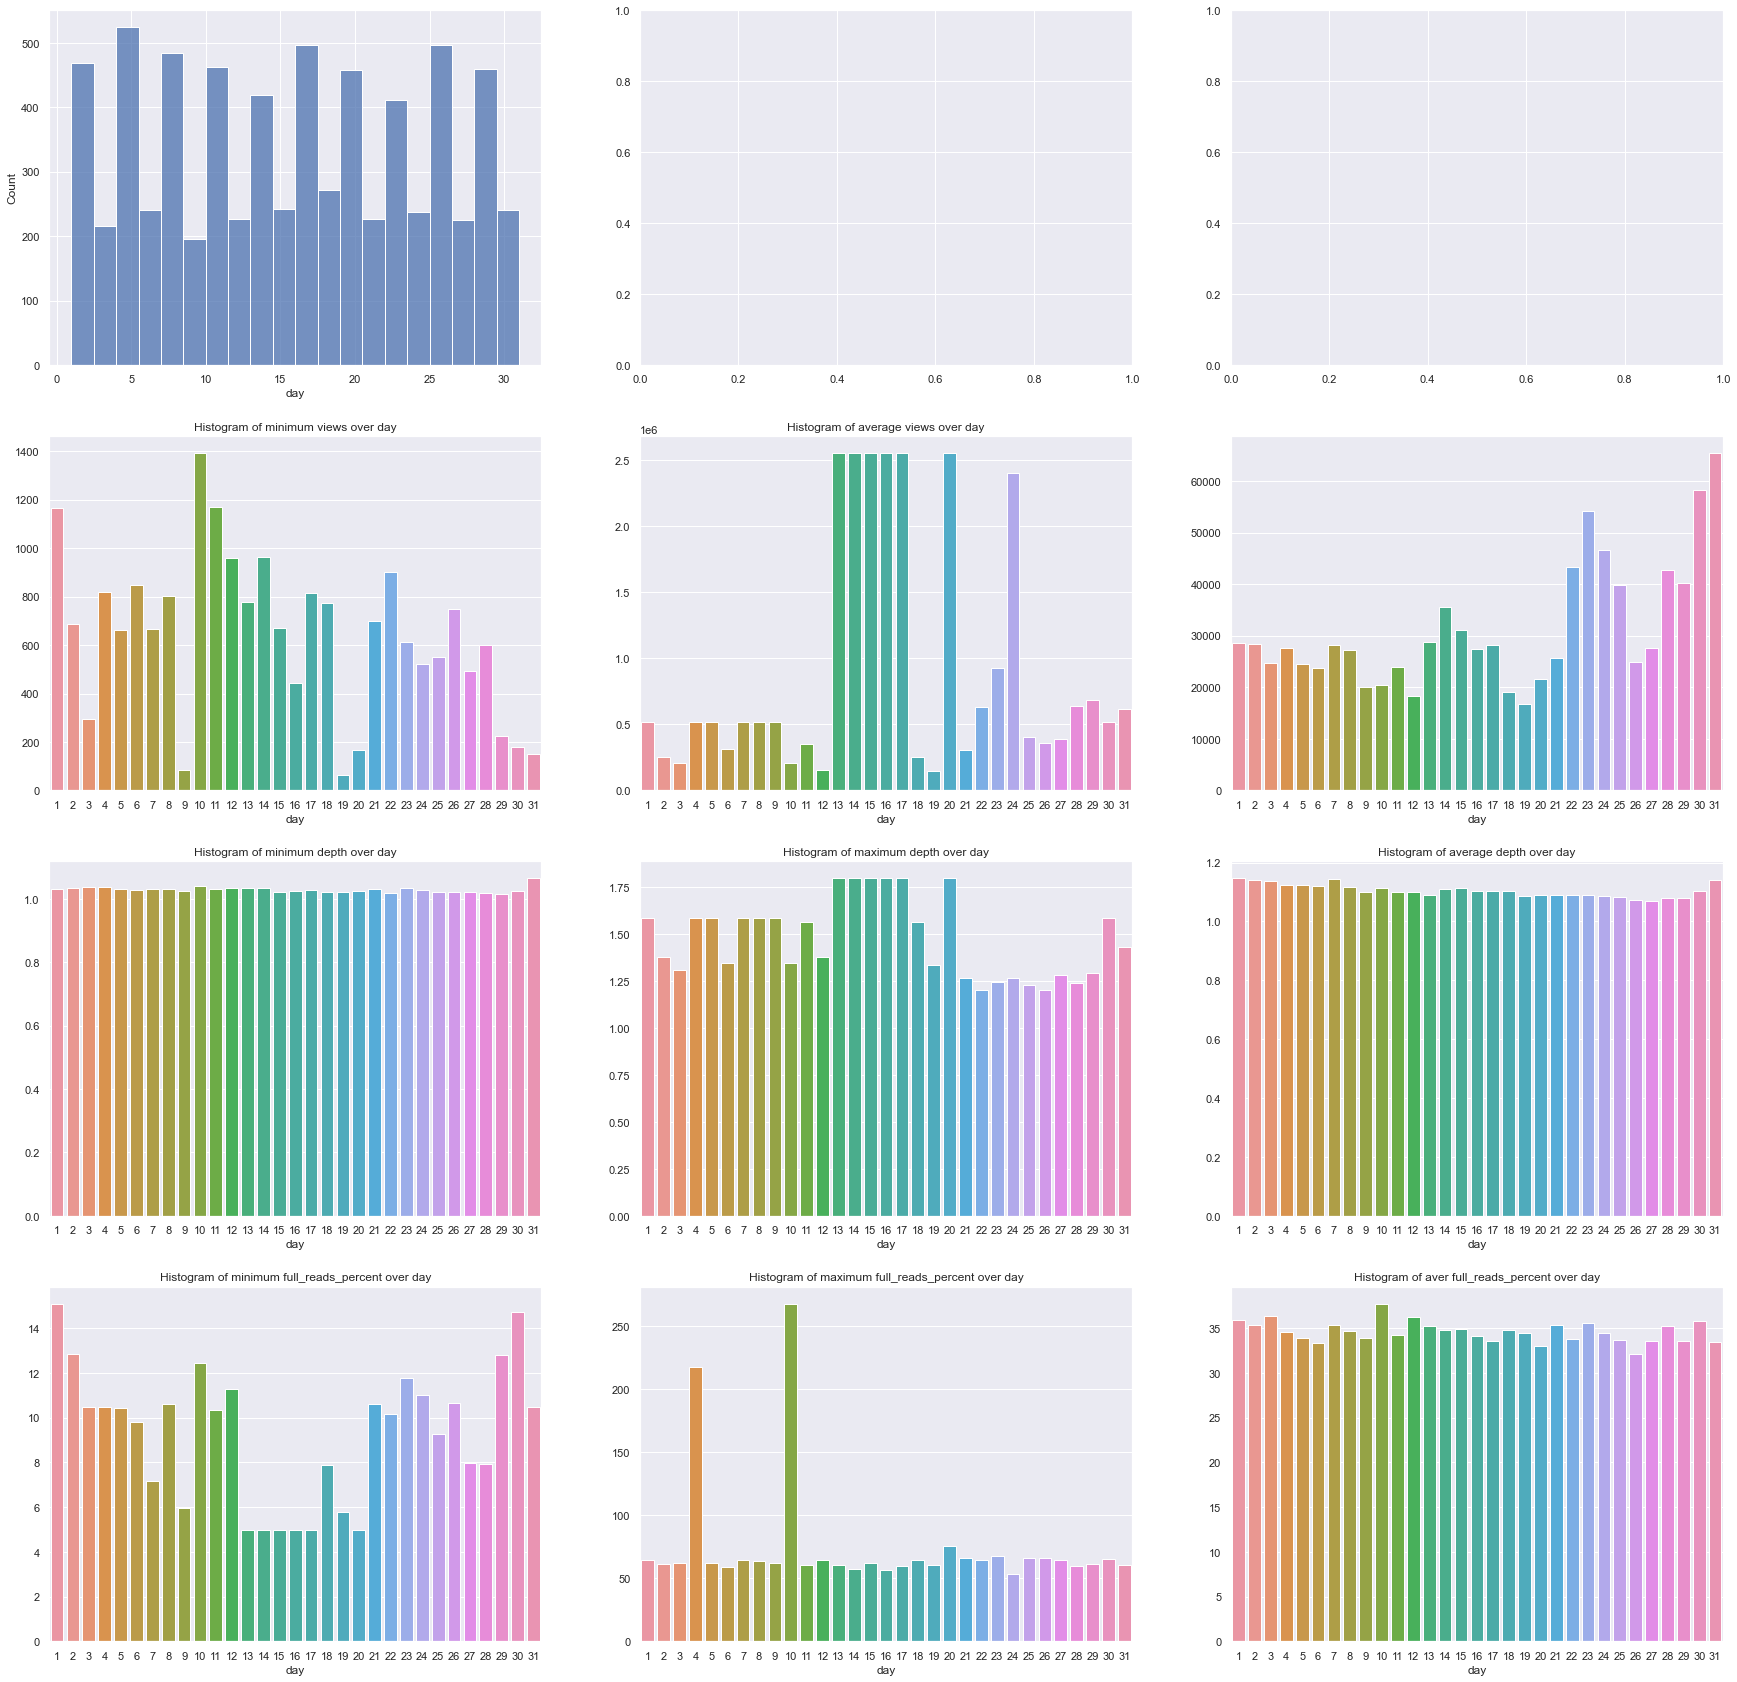

In [90]:
plot_hists_sns(df_train, 'day')

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


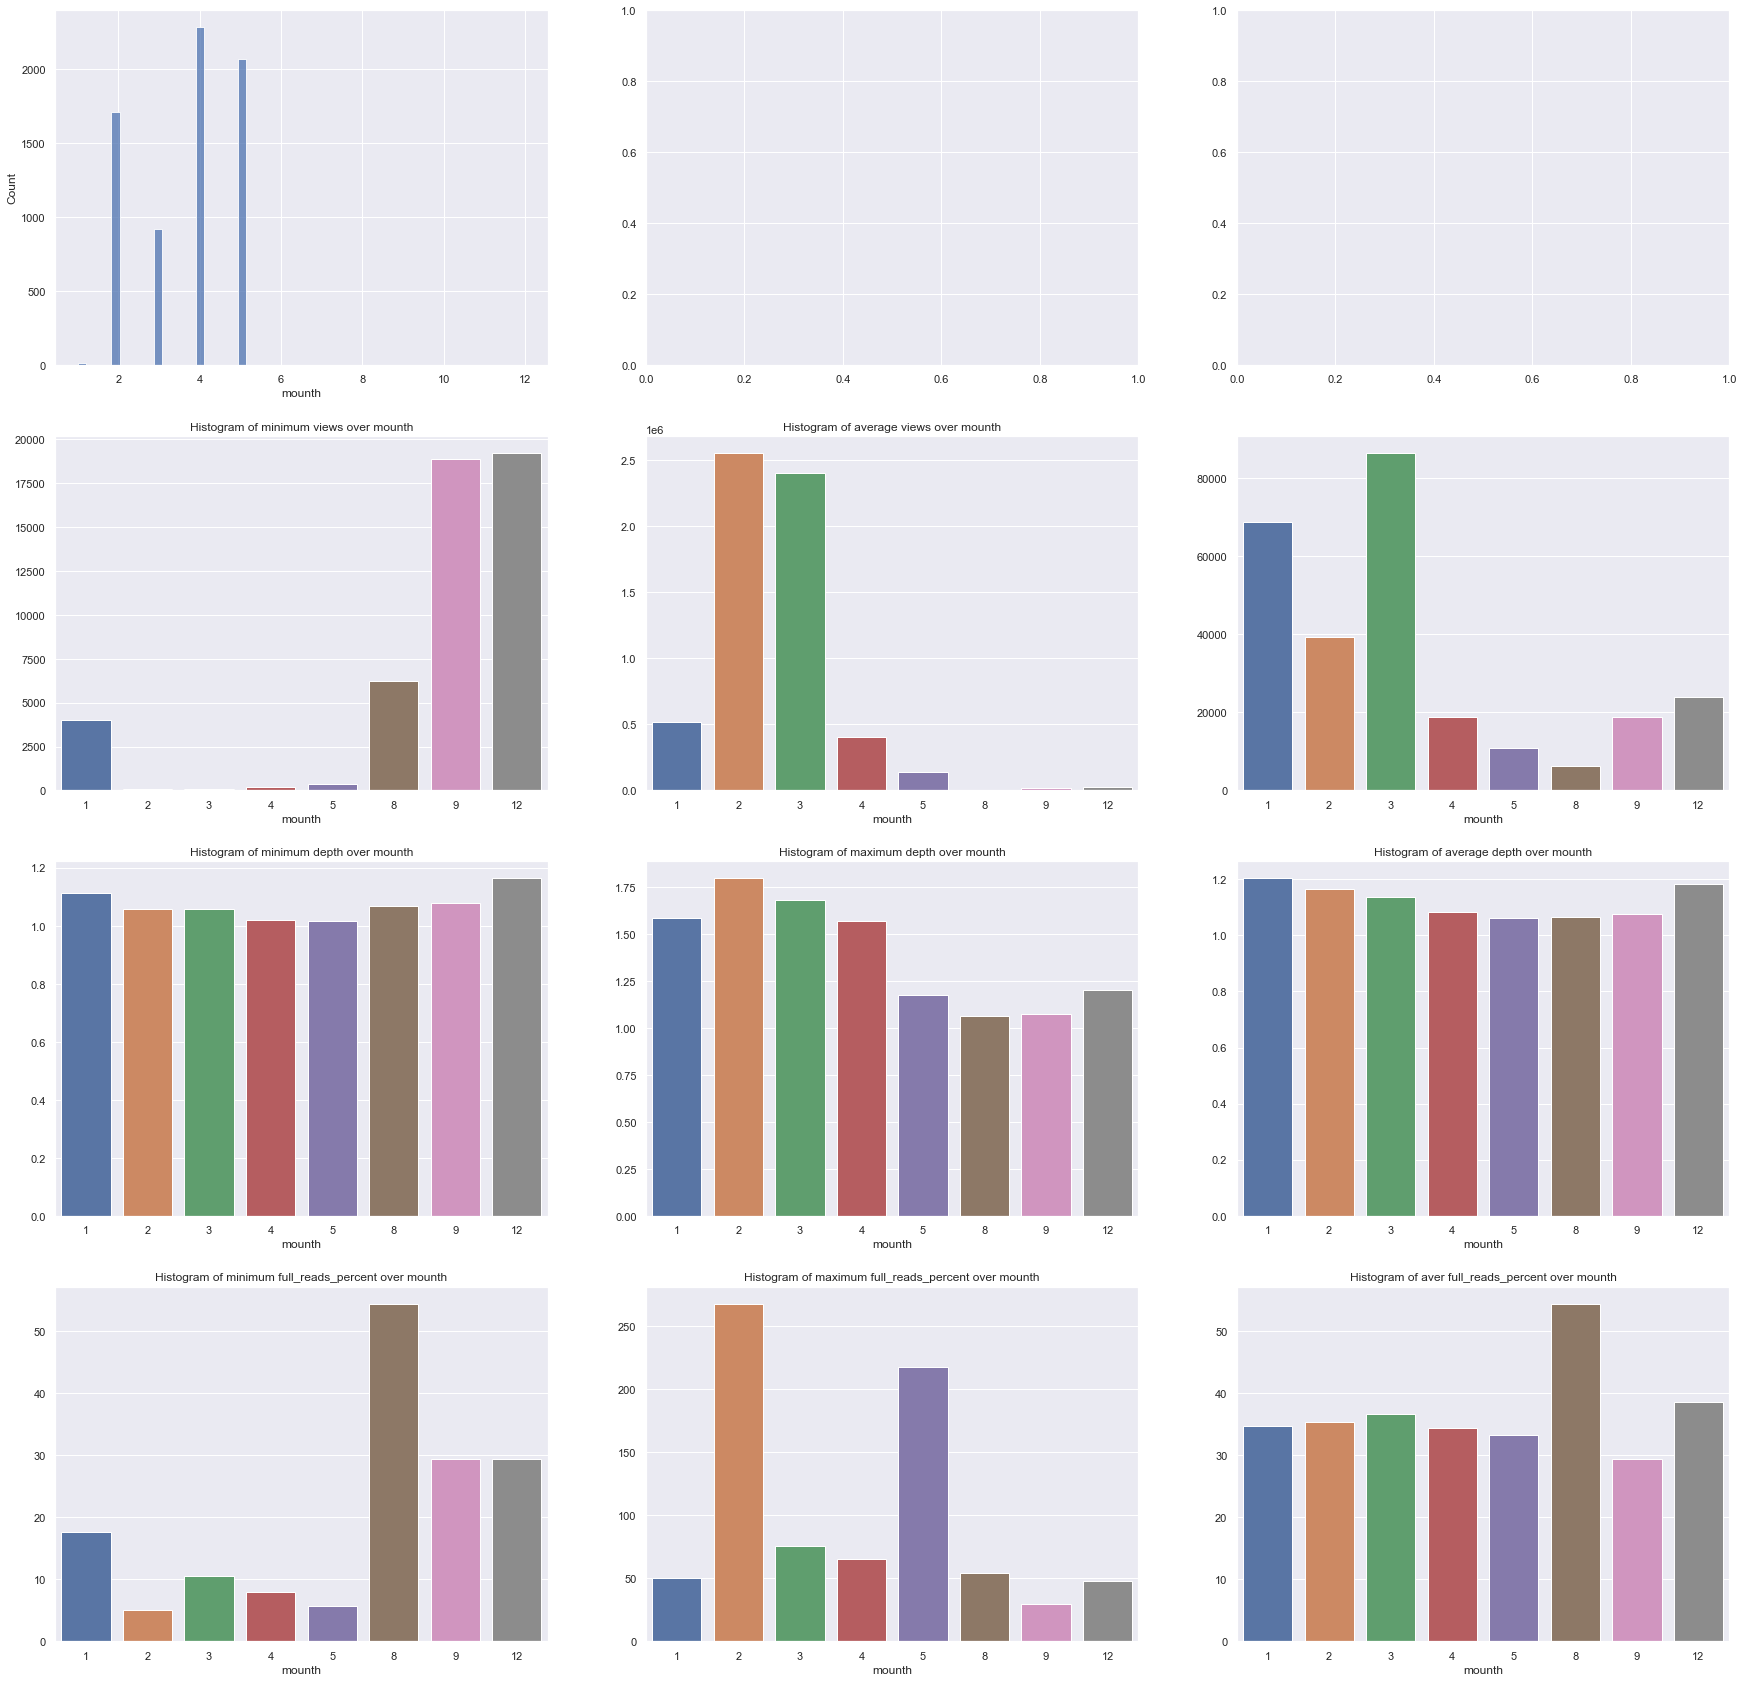

In [91]:
plot_hists_sns(df_train, 'mounth')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


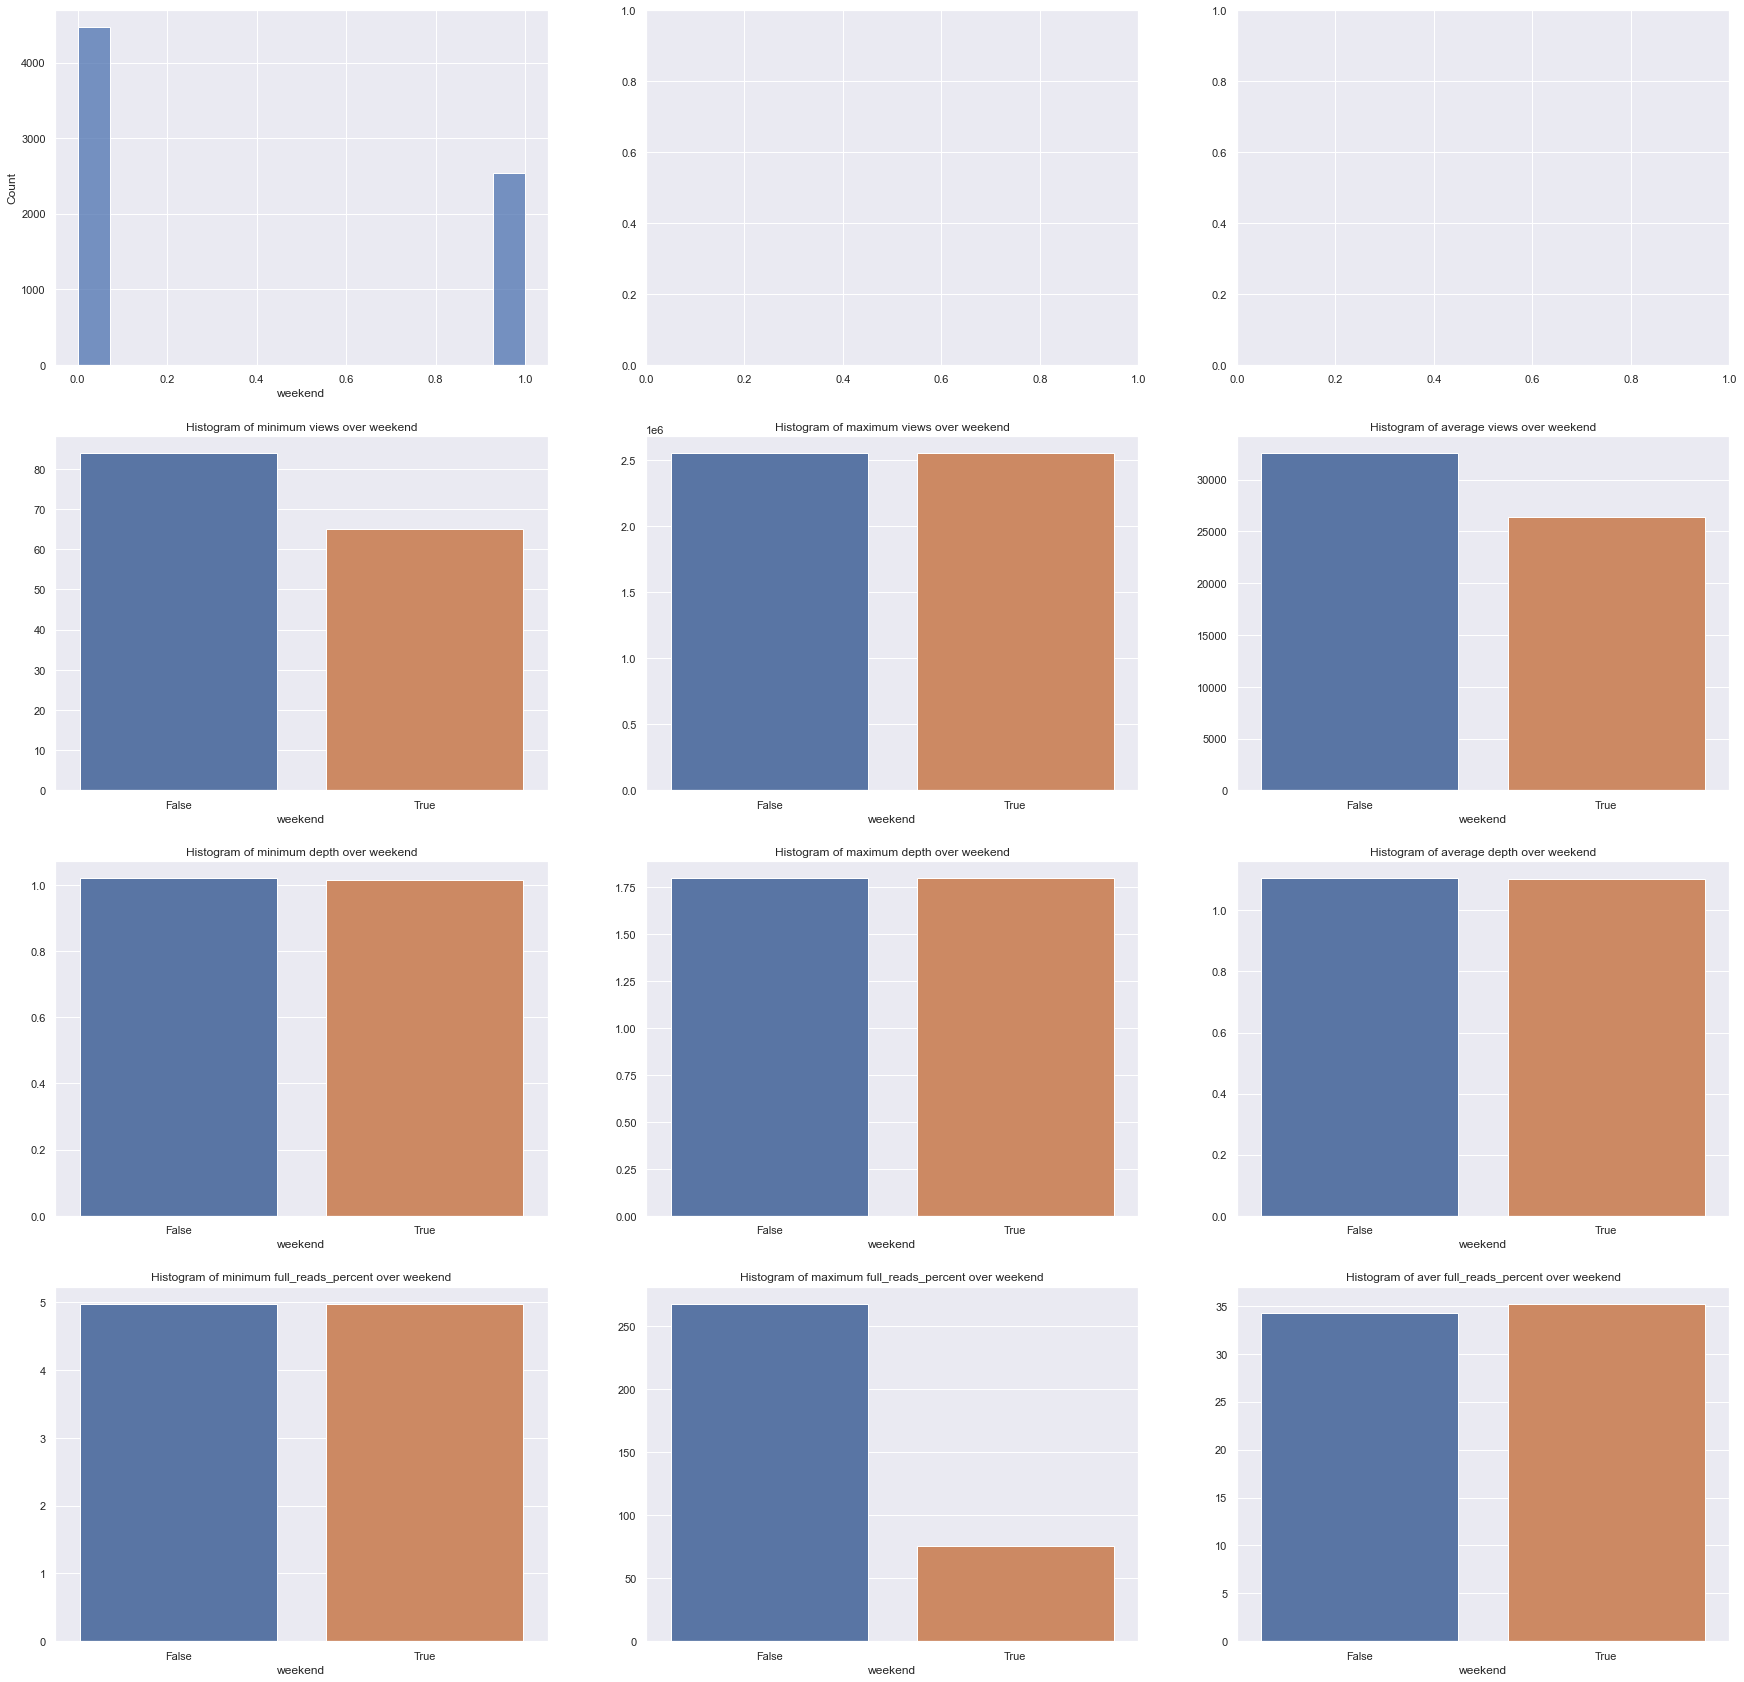

In [129]:
plot_hists_sns(df_train, 'weekend')

# category

In [99]:
df_train.category.nunique(), df_train.category.unique(), 

(9,
 array(['5409f11ce063da9c8b588a18', '5409f11ce063da9c8b588a12',
        '5433e5decbb20f277b20eca9', '540d5ecacbb20f2524fc050a',
        '540d5eafcbb20f2524fc0509', '5409f11ce063da9c8b588a13',
        '5e54e2089a7947f63a801742', '552e430f9a79475dd957f8b3',
        '5e54e22a9a7947f560081ea2'], dtype=object))

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


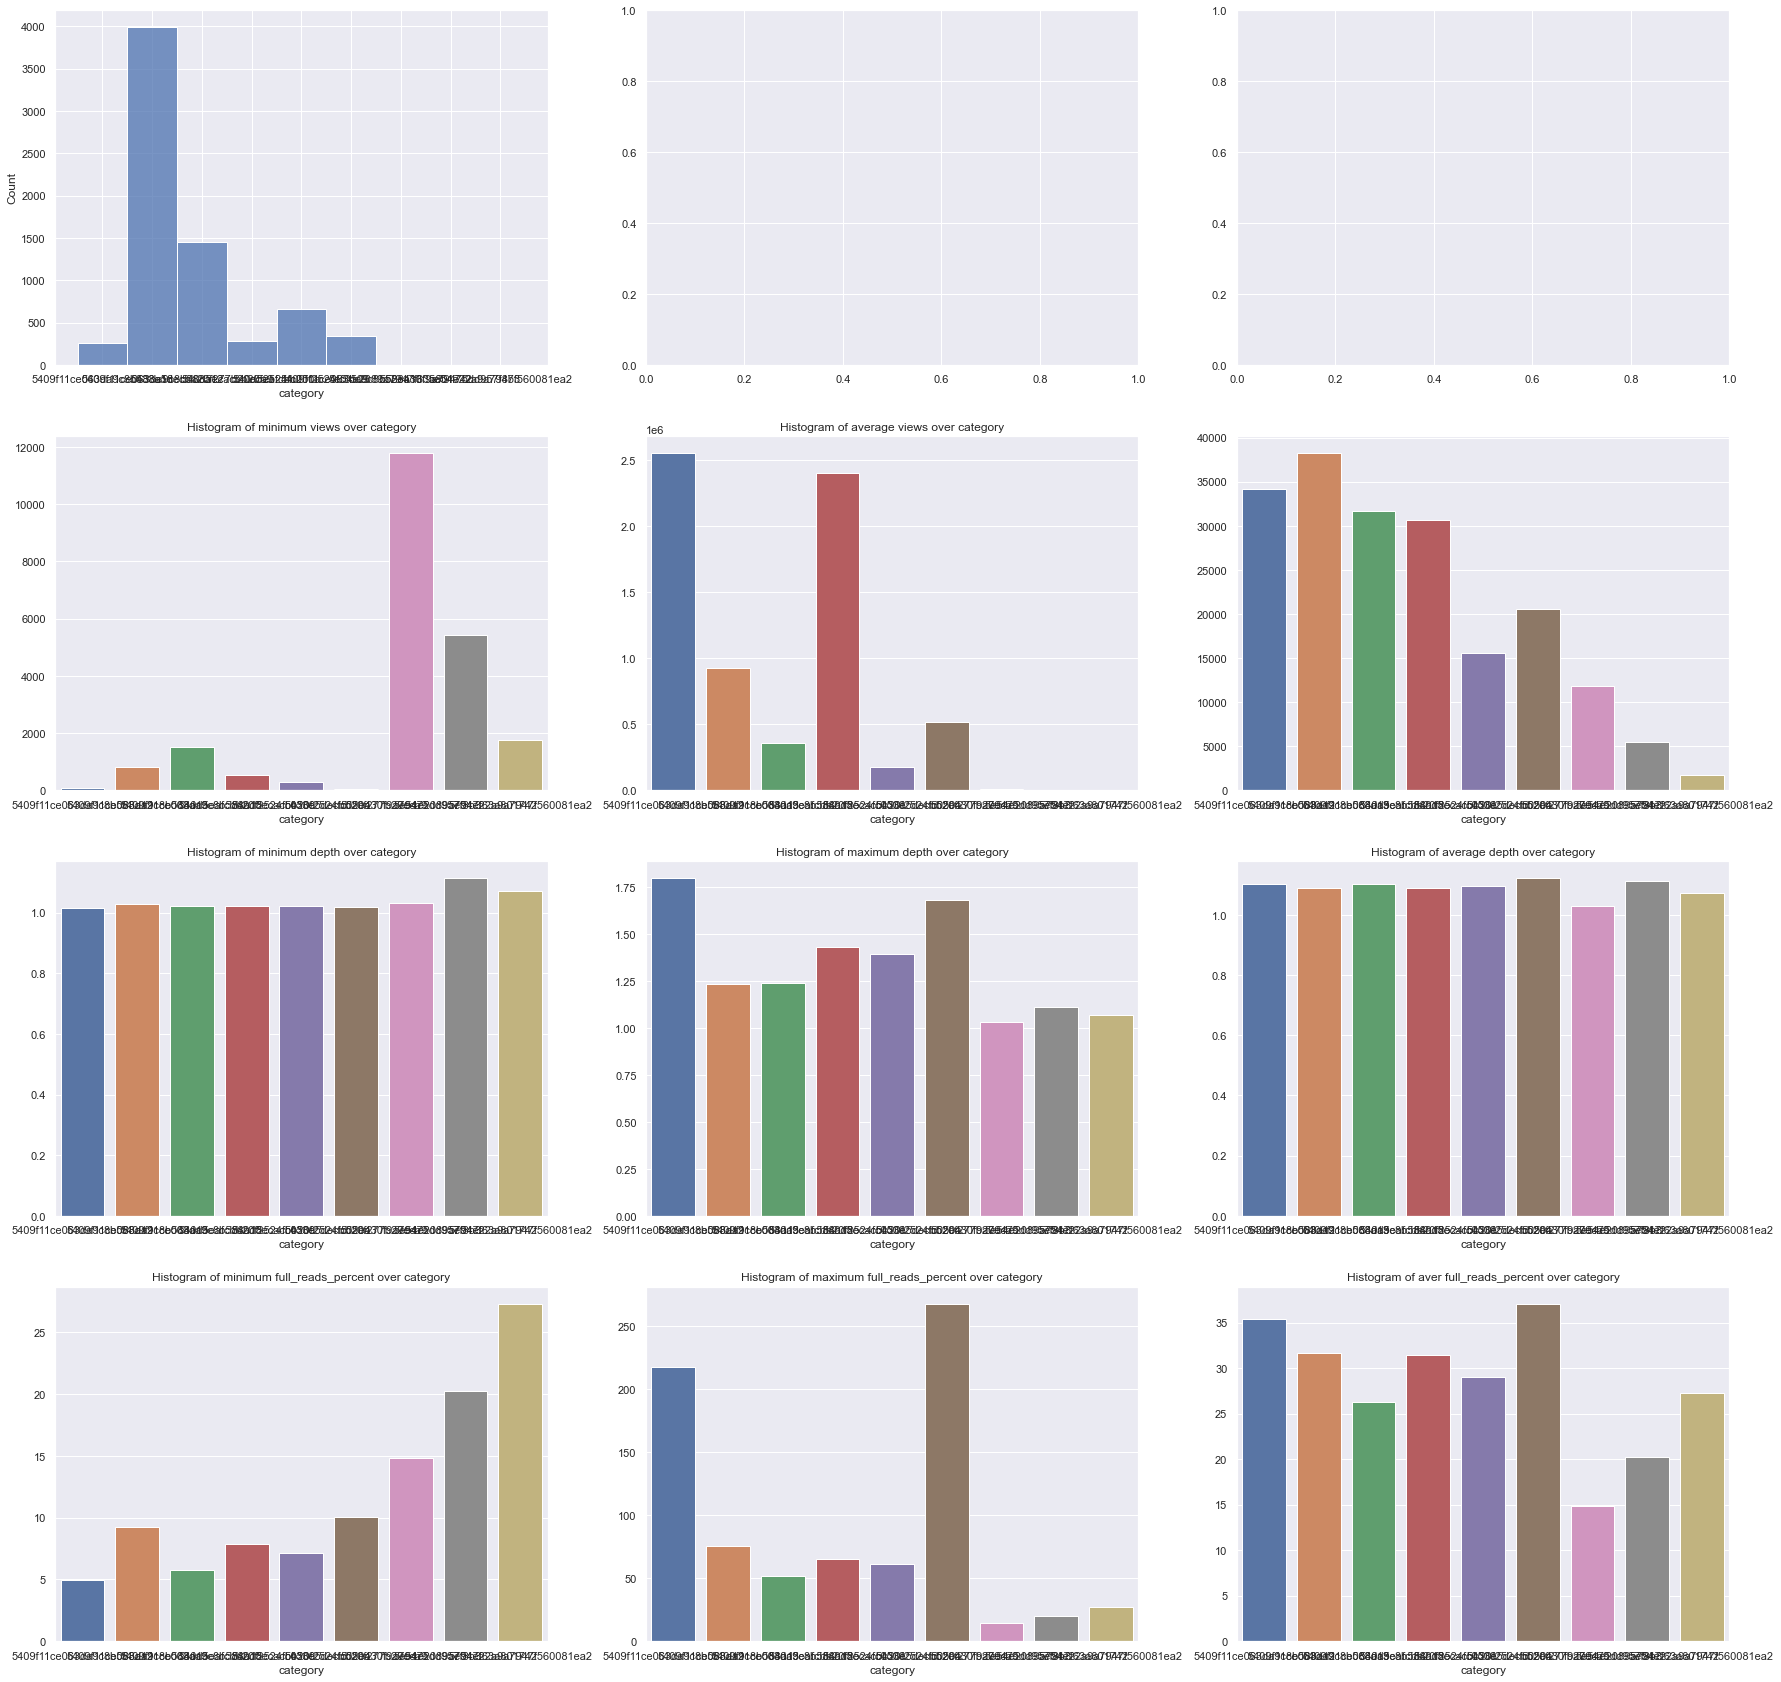

In [100]:
plot_hists_sns(df_train, 'category')

In [101]:
df_train.category.value_counts()

5409f11ce063da9c8b588a12    3988
5433e5decbb20f277b20eca9    1456
540d5eafcbb20f2524fc0509     667
5409f11ce063da9c8b588a13     338
540d5ecacbb20f2524fc050a     283
5409f11ce063da9c8b588a18     265
5e54e2089a7947f63a801742       1
552e430f9a79475dd957f8b3       1
5e54e22a9a7947f560081ea2       1
Name: category, dtype: int64

In [110]:
df_test.category.value_counts()

5409f11ce063da9c8b588a12    1718
5433e5decbb20f277b20eca9     637
540d5eafcbb20f2524fc0509     273
5409f11ce063da9c8b588a13     153
540d5ecacbb20f2524fc050a     127
5409f11ce063da9c8b588a18      92
Name: category, dtype: int64

вероятно стоит удалить последние 3 категории, что бы модель не переобучалась на них. к тому же их нет в тесте

In [106]:
exclude_category = {'5e54e2089a7947f63a801742', '552e430f9a79475dd957f8b3', '5e54e22a9a7947f560081ea2' }

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


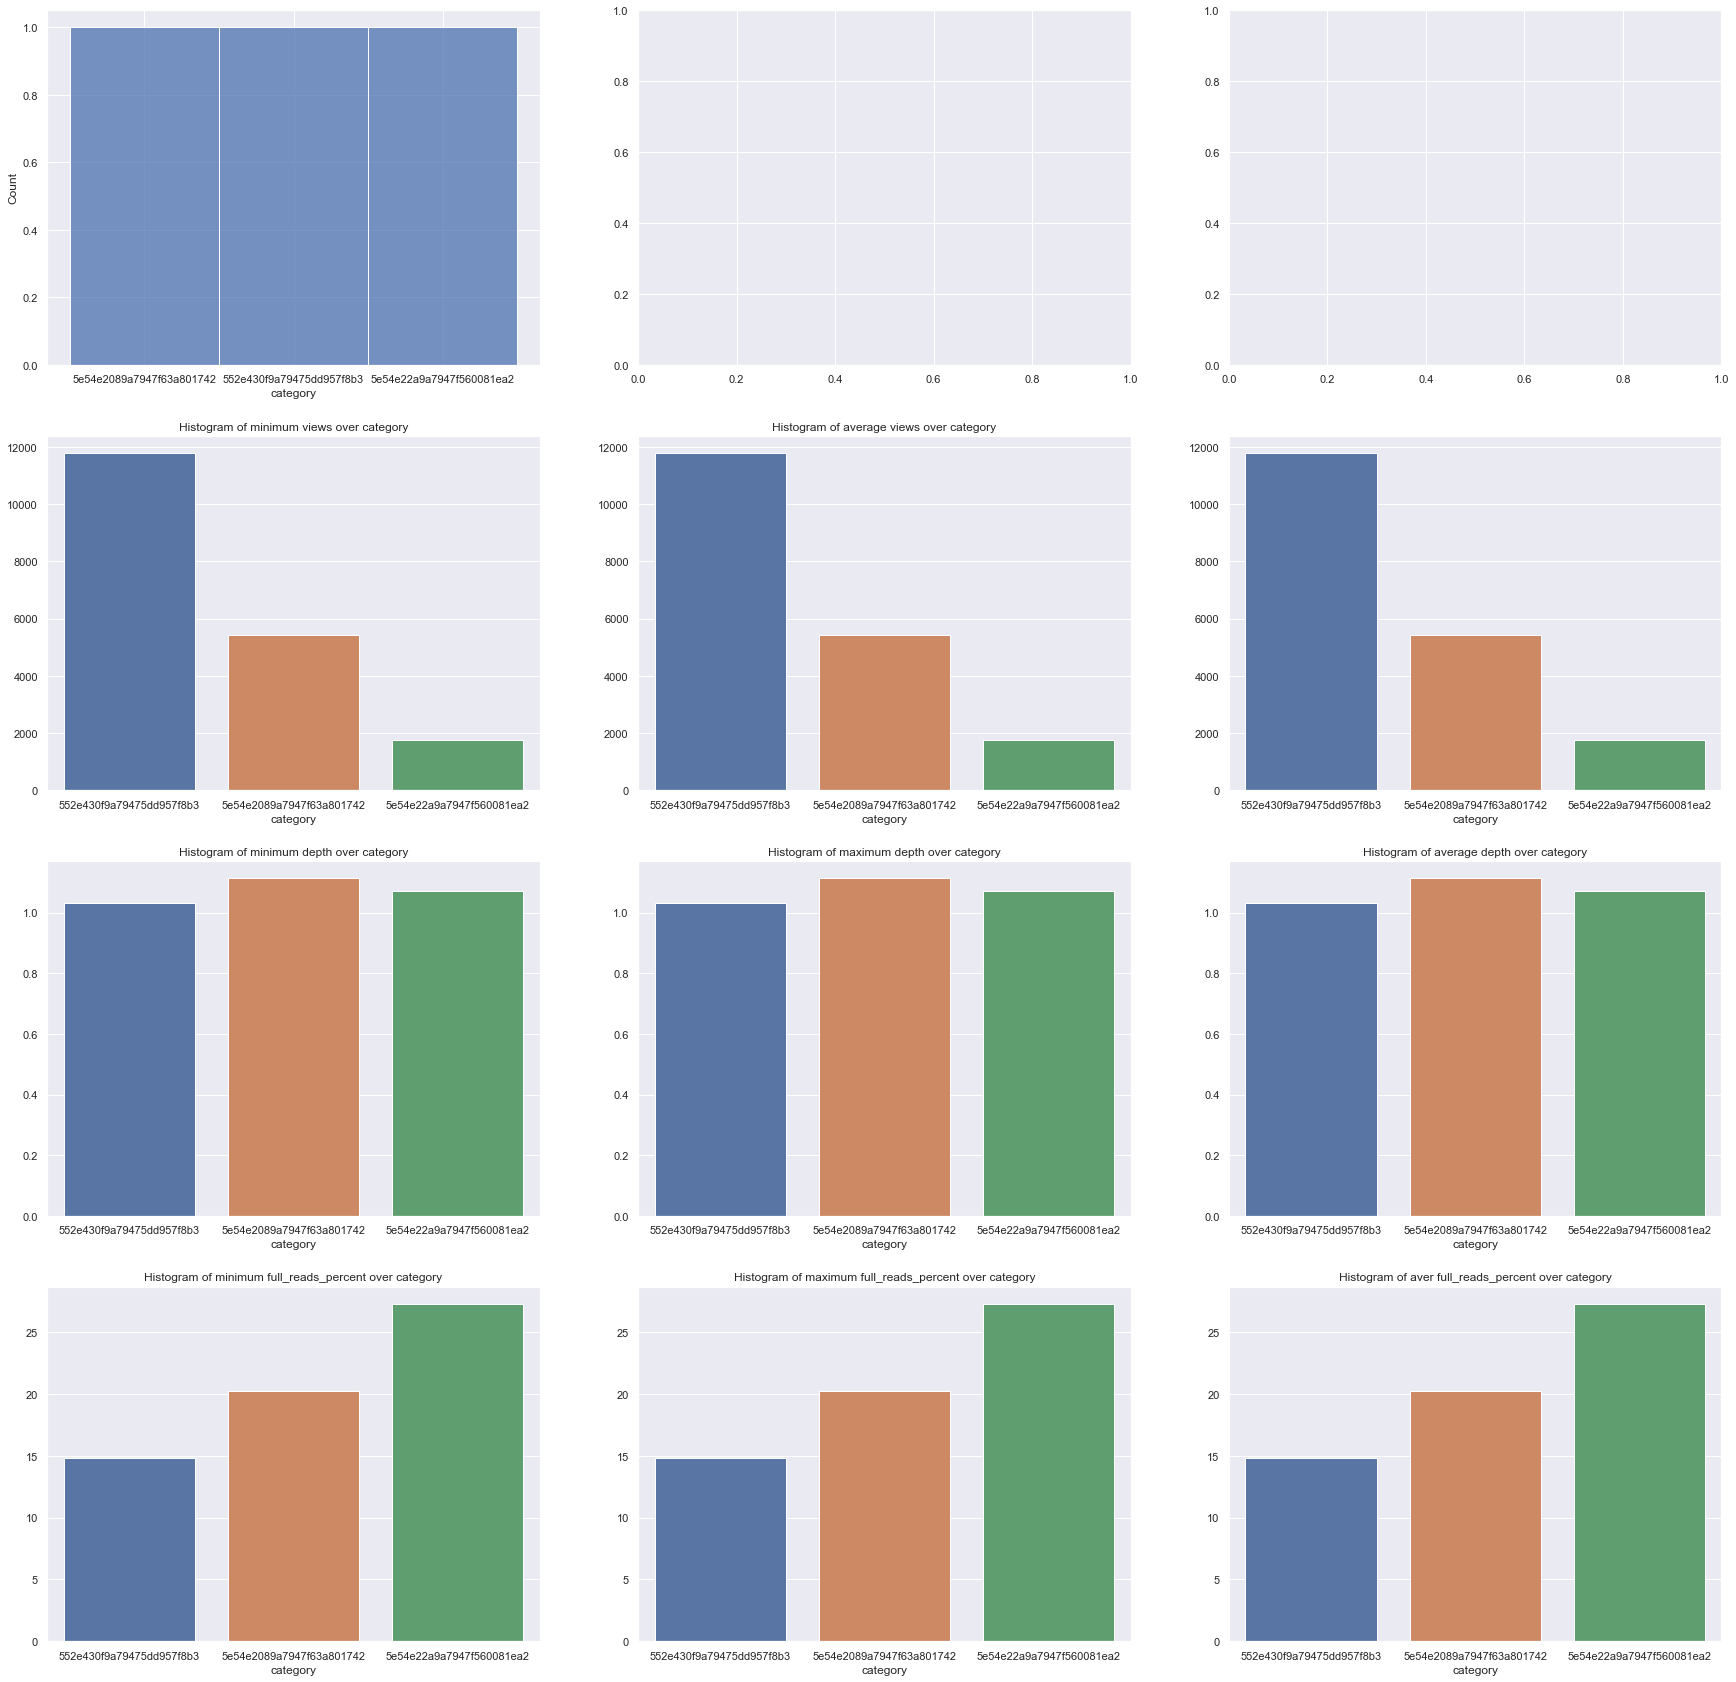

In [104]:
plot_hists_sns(df_train.query('category in @exclude_category'), 'category')

## authors

In [176]:
df_train['authors']  = df_train.authors.apply(lambda x: literal_eval(x))
df_train['Nauthors'] = df_train.authors.apply(lambda x: len(x))

df_test['authors']  = df_test.authors.apply(lambda x: literal_eval(x))
df_test['Nauthors'] = df_test.authors.apply(lambda x: len(x))

In [177]:
df_train['Nauthors'].value_counts()

1     3457
0     2900
2      547
3       65
14      13
4       10
5        8
Name: Nauthors, dtype: int64

In [178]:
df_test['Nauthors'].value_counts()

1     1469
0     1229
2      262
3       28
14       5
5        4
4        3
Name: Nauthors, dtype: int64

удивительно, что возможные значения количества авторов в трейне и тесте совпадают. можно использовать как признак  
однако значения при > 3 малы, что может привести к переобучению

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


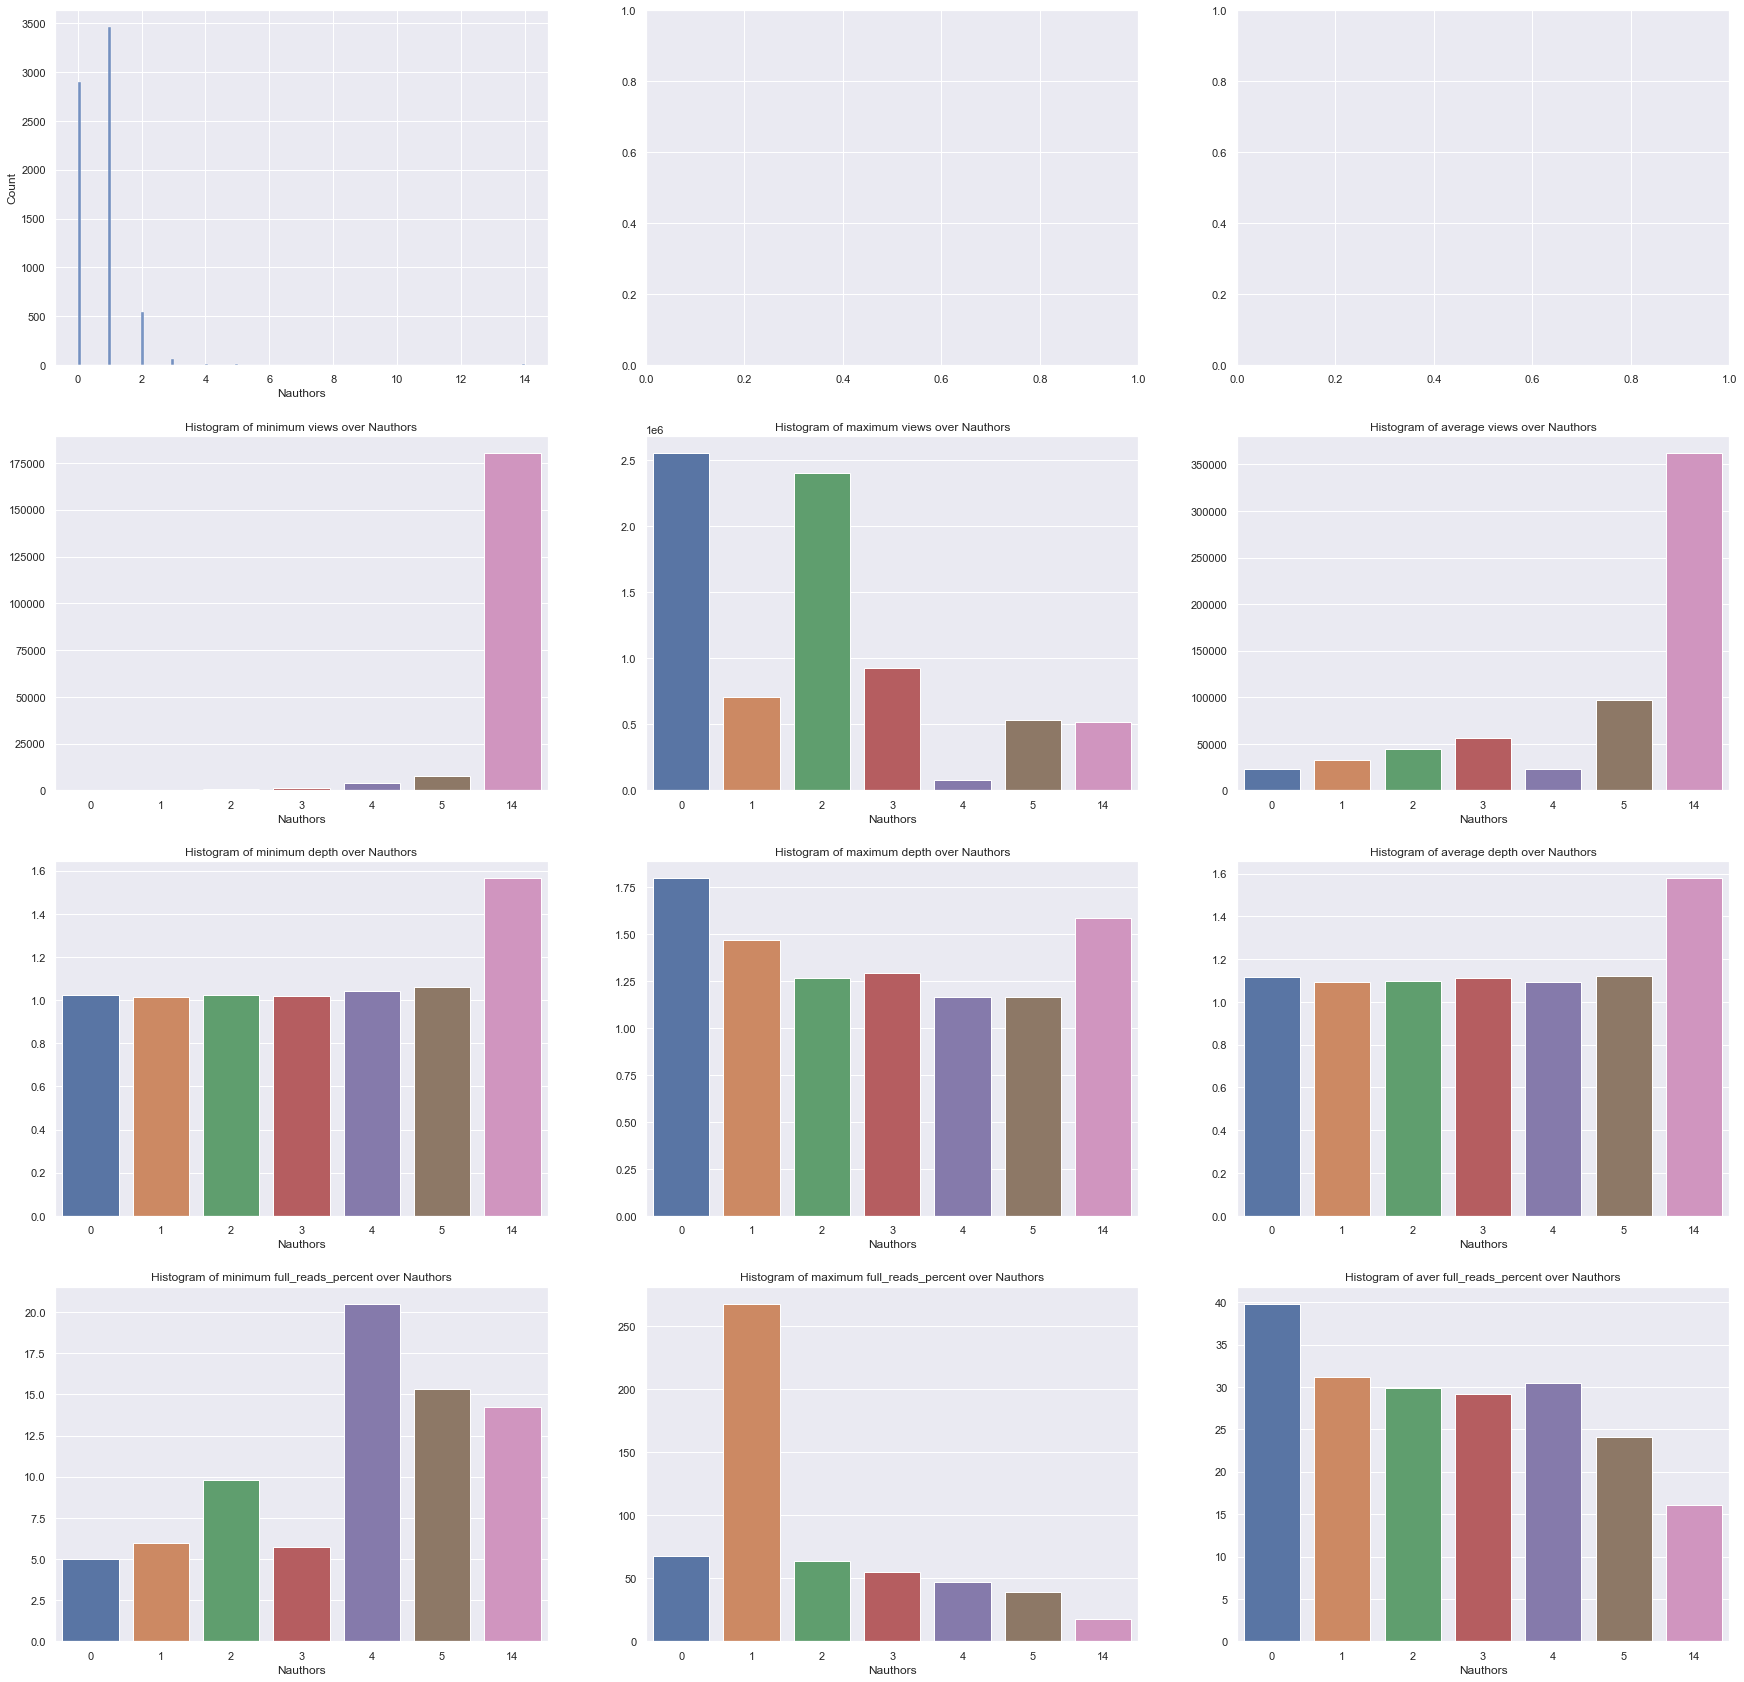

In [175]:
plot_hists_sns(df_train, 'Nauthors')

In [194]:
df_train['Nauthors_upd'] = df_train['Nauthors'].apply(lambda x: x if x < 4 else 4) # 3

In [195]:
df_train['Nauthors_upd'].value_counts()

1    3457
0    2900
2     547
3      65
4      31
Name: Nauthors_upd, dtype: int64

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


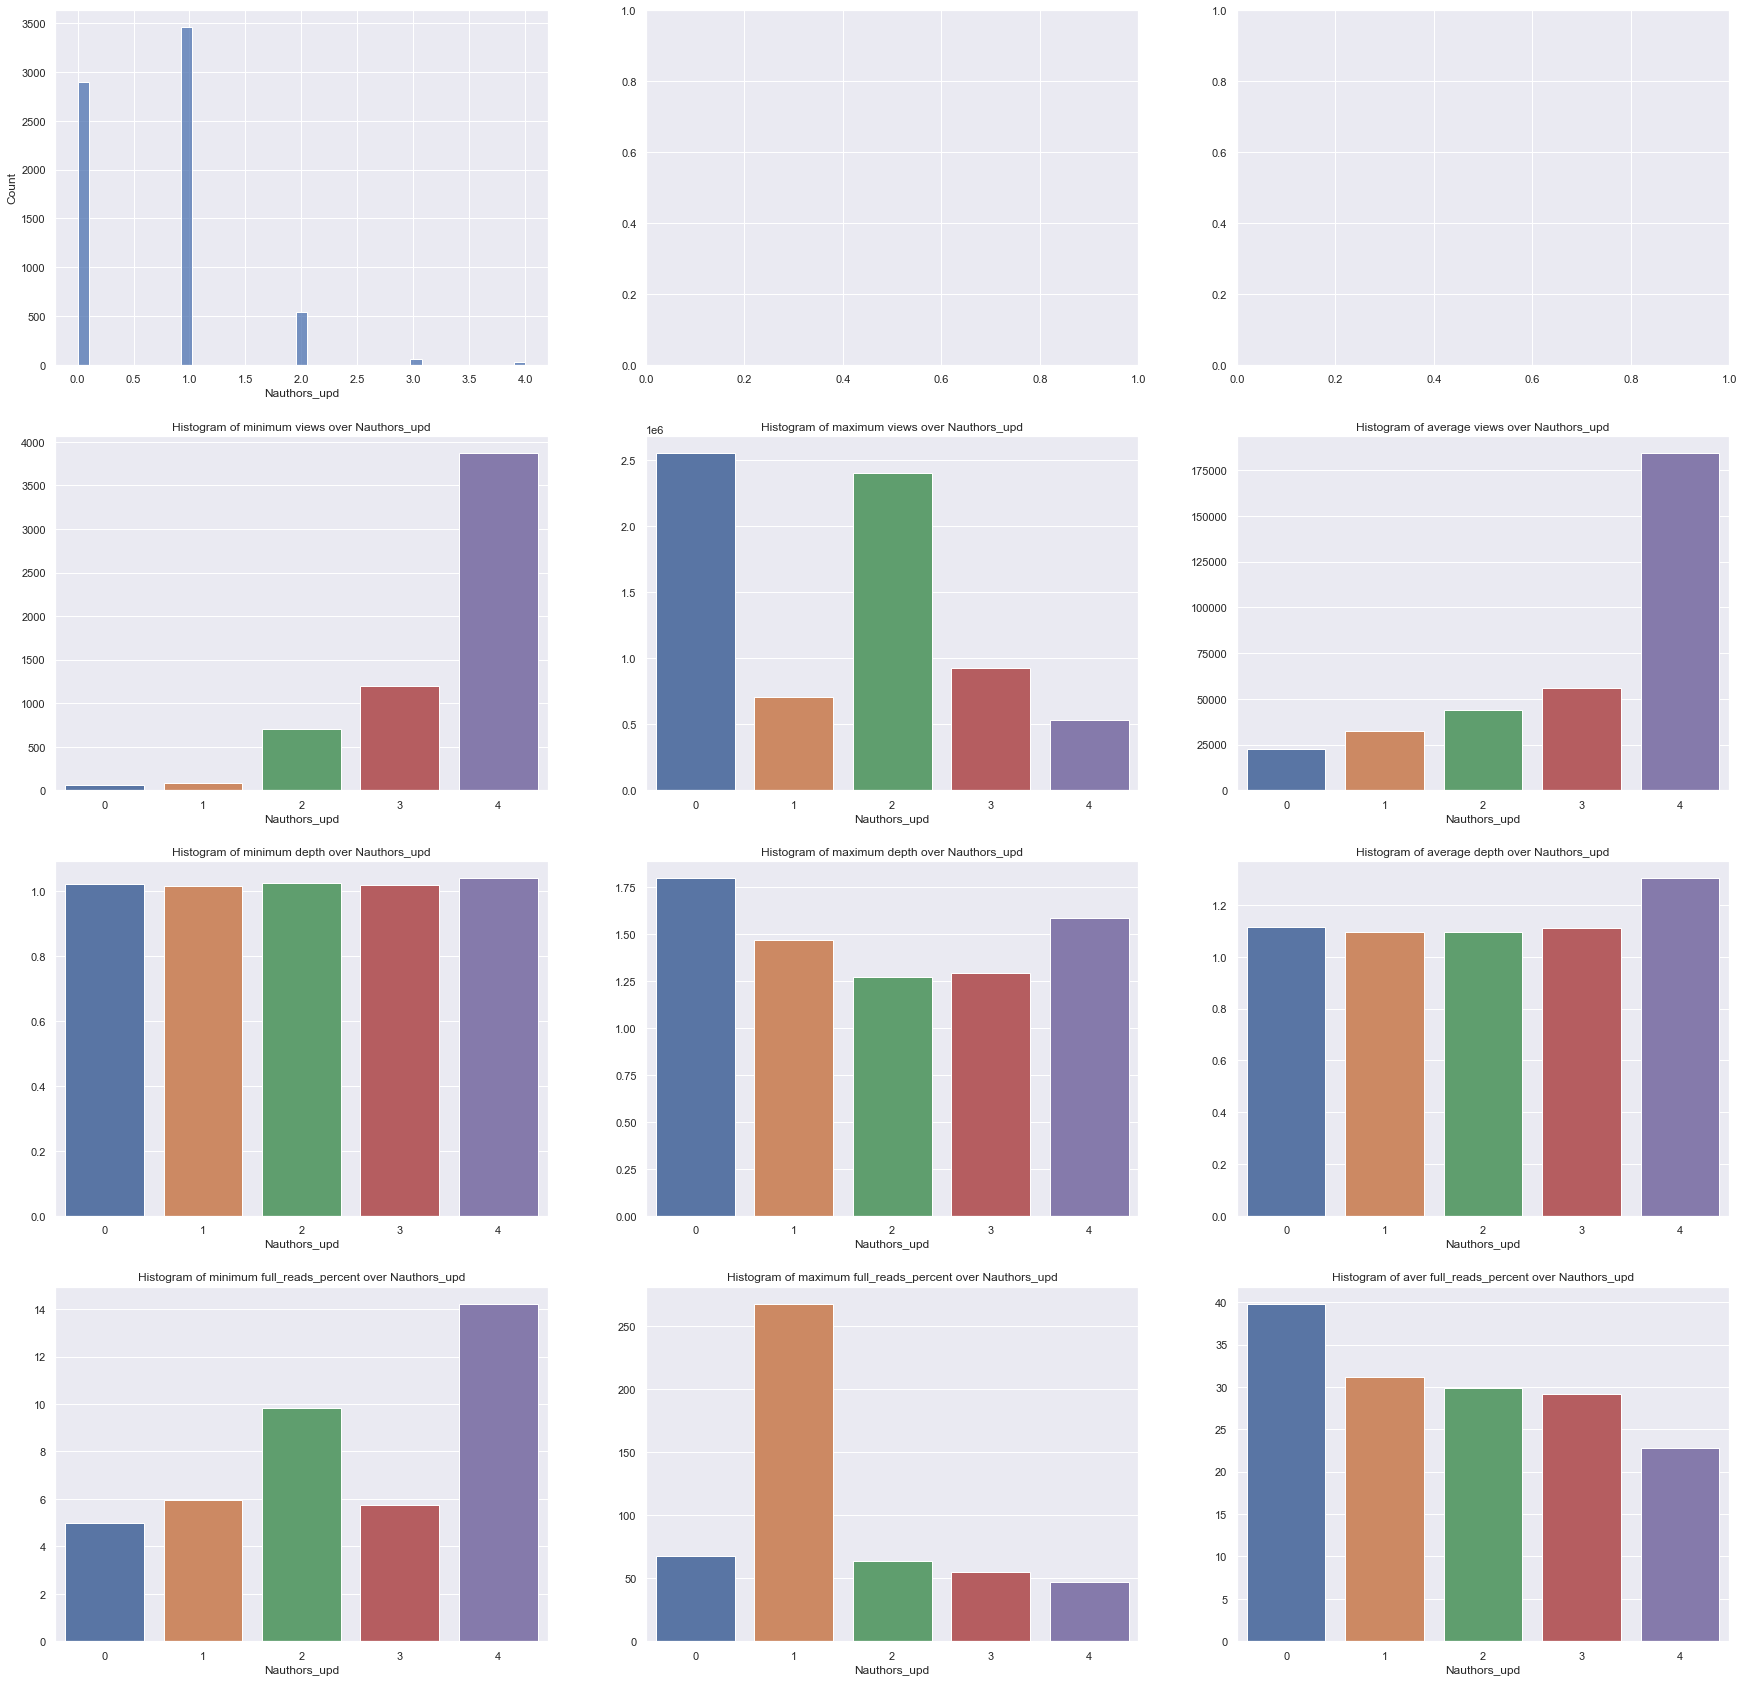

In [196]:
plot_hists_sns(df_train, 'Nauthors_upd')

In [197]:
all_authors = set()
for el in df_train.authors.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_authors.add(el[0])
        continue
        
    for author in el:
        all_authors.add(author)

In [182]:
len(all_authors)

100

In [208]:
all_authors_test = set()
for el in df_test.authors.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_authors_test.add(el[0])
        continue
        
    for author in el:
        all_authors_test.add(author)

In [209]:
len(all_authors_test)

84

In [213]:
missed_authors = set()
for el in all_authors_test:
    if el not in all_authors:
        missed_authors.add(el)

In [215]:
len(missed_authors)

2

только 2 (2%) автора не представленны в обучающей выборке

## tags

In [201]:
df_train['tags']  = df_train.tags.apply(lambda x: literal_eval(x))
df_train['Ntags'] = df_train.tags.apply(lambda x: len(x))

df_test['tags']  = df_test.tags.apply(lambda x: literal_eval(x))
df_test['Ntags'] = df_test.tags.apply(lambda x: len(x))

In [202]:
df_train.Ntags.value_counts()

4     2379
3     2120
5     1230
2      542
6      438
7      149
1       47
8       42
0       31
9       14
11       4
10       4
Name: Ntags, dtype: int64

In [203]:
df_test.Ntags.value_counts()

4     1052
3      873
5      518
2      228
6      197
7       56
8       27
1       22
9       11
0        8
10       4
13       2
14       1
12       1
Name: Ntags, dtype: int64

в тест есть статьи с большим количеством тэгов чем в трейне. хоть их количество и мало

C:\Users\_v010ch_\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


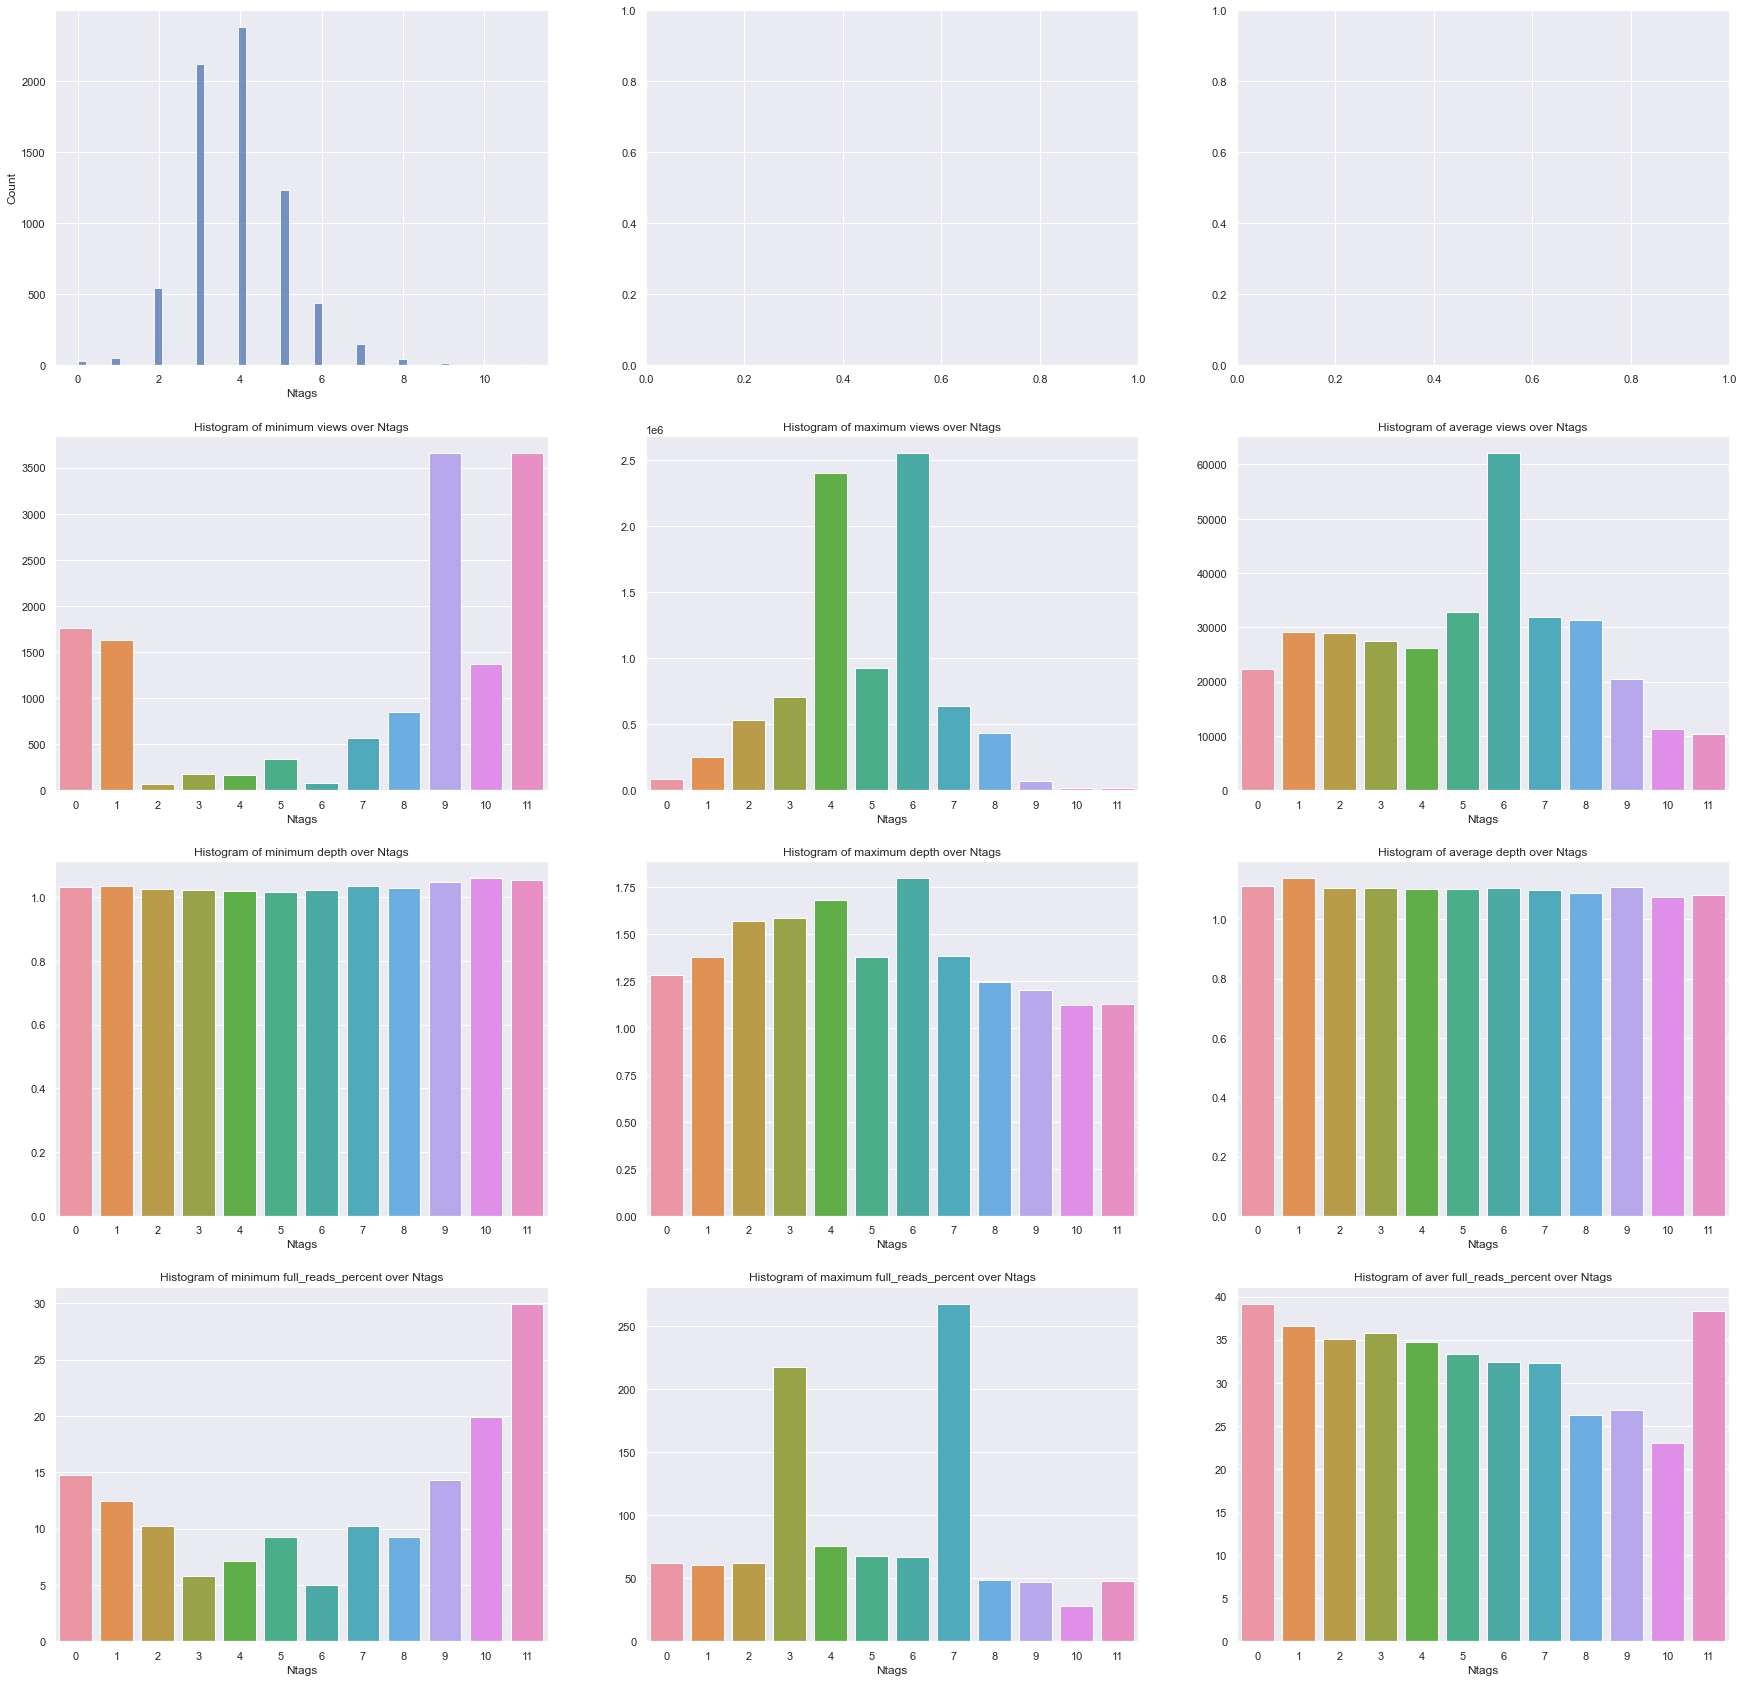

In [210]:
plot_hists_sns(df_train, 'Ntags')

In [204]:
all_tags = set()
for el in df_train.tags.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_tags.add(el[0])
        continue
        
    for tag in el:
        all_tags.add(tag)

In [205]:
len(all_tags)

5371

In [206]:
all_tags_test = set()
for el in df_test.tags.values:
    if len (el) == 0:
        continue
    if len(el) == 1:
        all_tags_test.add(el[0])
        continue
        
    for tag in el:
        all_tags_test.add(tag)

In [207]:
len(all_tags_test)

3476

In [216]:
missed_tags = set()
for el in all_tags_test:
    if el not in all_tags:
        missed_tags.add(el)


In [217]:
len(missed_tags)

1149

1149 (17%) тэгов не представлены в обучающей выборке!!!!!

## ctr

array([[<AxesSubplot:title={'center':'ctr'}>]], dtype=object)

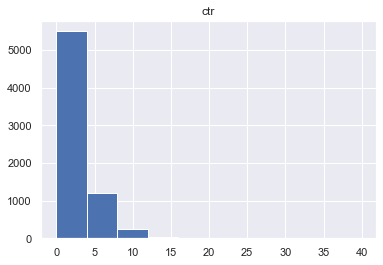

In [221]:
df_train.hist('ctr')

In [222]:
df_train.ctr.min(), df_train.ctr.max()

(0.0, 39.877)

In [12]:
df_train.columns

Index(['title', 'publish_date', 'session', 'authors', 'ctr', 'category',
       'tags', 'views', 'depth', 'full_reads_percent', 'day', 'mounth'],
      dtype='object')

In [15]:

#df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
#df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [29]:
df_train.authors

document_id
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ    560
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw     38
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA    560
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w    560
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg    560
                                                 ... 
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw    132
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ    424
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug    560
627303699a794749b8116abc12JX_3ZDTDu2XHF3k2eJVg    560
627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow    323
Name: authors, Length: 7000, dtype: int32

In [30]:
df_train.shape

(7000, 14)

In [33]:
df_train.index.nunique()

7000